In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 0,
            traj.state_charges.attrs,
        )
    )


shnitsel_db_single_nx: Trajectory = st.io.read(
    'test_data/playground/TRAJECTORIES/TRAJ1', parallel=False
)  # type: ignore
# shnitsel_db_full: ShnitselDB = st.io.read(
#     'test_data/playground/TRAJECTORIES/', parallel=True
# )  # type: ignore


# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces

INFO:root:Assigning id 1 to trajectory
INFO:root:Assigning id 1 to trajectory
INFO:root:Identified the path `test_data/playground/TRAJECTORIES/TRAJ1` to be of format `newtonx`.
INFO:root:Did not find test_data/playground/TRAJECTORIES/TRAJ1/RESULTS/dyn.xyz for position, atom names and types input.
INFO:root:Assigning velocities from dyn.out
INFO:root:Assigning forces from dyn.out


<xarray.Dataset> Size: 451kB
Dimensions:                 (time: 201, state: 7, atom: 10, direction: 3,
                             statecomb: 21)
Coordinates: (12/15)
  * time                    (time) float64 2kB 0.0 0.5 1.0 ... 99.0 99.5 100.0
  * state                   (state) int64 56B 1 2 3 4 5 6 7
  * atom                    (atom) int64 80B 0 1 2 3 4 5 6 7 8 9
  * direction               (direction) <U1 12B 'x' 'y' 'z'
  * statecomb               (statecomb) object 168B MultiIndex
    state_names             (state) <U2 56B 'S0' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6'
    ...                      ...
    state_charges           (state) float32 28B 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    astate                  (time) int64 2kB 4 4 4 4 4 4 4 4 ... 2 2 2 2 2 2 2 2
    atNames                 (atom) <U1 40B 'N' 'N' 'C' 'C' ... 'H' 'H' 'H' 'H'
    atNums                  (atom) int64 80B 7 7 6 6 6 6 1 1 1 1
  * from                    (statecomb) int64 168B 1 1 1 1 1 1 2 ... 4 4 4 5 5 6
  * to                      (statecomb) int64 168B 2 3 4 5 6 7 3 ... 5 6 7 6 7 7
Data variables:
    energy                  (time, state) float64 11kB -263.9 -263.8 ... -263.6
    e_kin                   (time) float64 2kB 0.06349 0.06314 ... 0.06262
    velocities              (time, atom, direction) float64 48kB 1.56e-06 ......
    forces                  (time, state, atom, direction) float64 338kB 0.0 ...
    atXYZ                   (time, atom, direction) float64 48kB 0.01591 ... ...
Attributes: (12/15)
    input_format:           newtonx
    t_max:                  201
    delta_t:                0.5
    max_ts:                 201
    completed:              True
    input_type:             dynamic
    ...                     ...
    num_triplets:           0
    has_forces:             active_only
    misc_input_settings:    {'control.dyn': {'nat': 10, 'nstat': 7, 'nstatdyn...
    trajectory_input_path:  test_data/playground/TRAJECTORIES/TRAJ1
    trajid:                 1
    __original_dataset:     <xarray.Dataset> Size: 451kB\nDimensions:        ...

INFO:rdkit:Enabling RDKit 2025.09.1 jupyter extensions
INFO:root:Dimension atomcomb is being generated.
INFO:root:cached pca_data in 0.01215339100053825 s


ValueError: tuple.index(x): x not in tuple

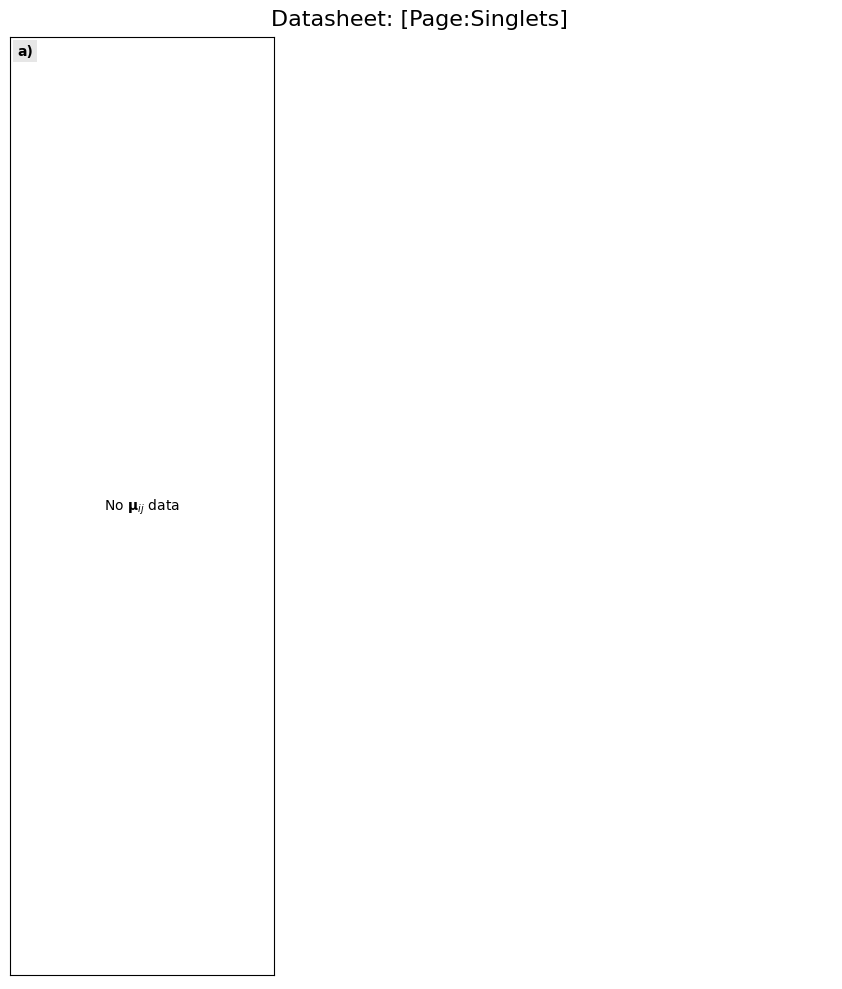

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_single_nx)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(path="./triplet_sharc.pdf")
# sheet.datasheet_pages

In [ ]:
%time sheet.calc_all()

In [ ]:
%time sheet.plot_per_state_histograms()

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')